In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from lgbm_full_model import FullLgbmPipeline
from evaluation import ModelSelector
from evaluation import ModelEvaluation

In [3]:
model_config = {
    'target_column': 'anomaly',
    'look_back': 10,
    'num_splits': 2,
    'th' : 0.35
}

In [4]:
selector = ModelSelector(model_config,FullLgbmPipeline,min_splits=1,max_splits=10)

In [5]:
res = selector.select_best(f1_th=0.9)

Run model number 1
[LightGBM] [Info] Number of positive: 4309, number of negative: 8394
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 12703, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.339211 -> initscore=-0.666811
[LightGBM] [Info] Start training from score -0.666811
X.shape:  (1844, 1)
mar 0.1656 far 0.0162 f1 0.903
Run model number 2
[LightGBM] [Info] Number of positive: 2066, number of negative: 4285
[LightGBM] [Info] Total Bins 6117
[LightGBM] [Info] Number of data points in the train set: 6351, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.325303 -> initscore=-0.729506
[LightGBM] [Info] Start training from score -0.729506
[LightGBM] [Info] Number of positive: 2243, number of negative: 4109
[LightGBM] [Info] Total Bins 6118
[LightGBM] [Info] Number of data points in the train set: 6352, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353117 

,f1,mar,far
model_4,0.742500,0.048600,0.391200
model_2,0.920800,0.109600,0.046700
model_10,0.895600,0.150700,0.052800
model_5,0.898300,0.158200,0.037000
model_3,0.903000,0.159400,0.024600
model_1,0.903000,0.165600,0.016200
model_6,0.903000,0.176800,0.000000
model_8,0.900000,0.181800,0.000000
model_9,0.897700,0.185600,0.000000
model_7,0.897000,0.186800,0.000000


,f1,mar,far
model_2,0.920800,0.109600,0.046700


In [6]:
base_preds = pd.read_csv('../data/lgbm_baseline_predictions.csv')['y_pred']

In [10]:
eval_config = {
    'baseline' : {
        'y_test' :res['model'].y_test,
        'y_pred': base_preds.values,
        'th': 0.5
    },
    
    res['model_name'] : {
        'y_test' :res['model'].y_test,
        'y_pred':res['predictions'].values,
        'th' : 0.35
    }
}

In [11]:
eval = ModelEvaluation(eval_config=eval_config)

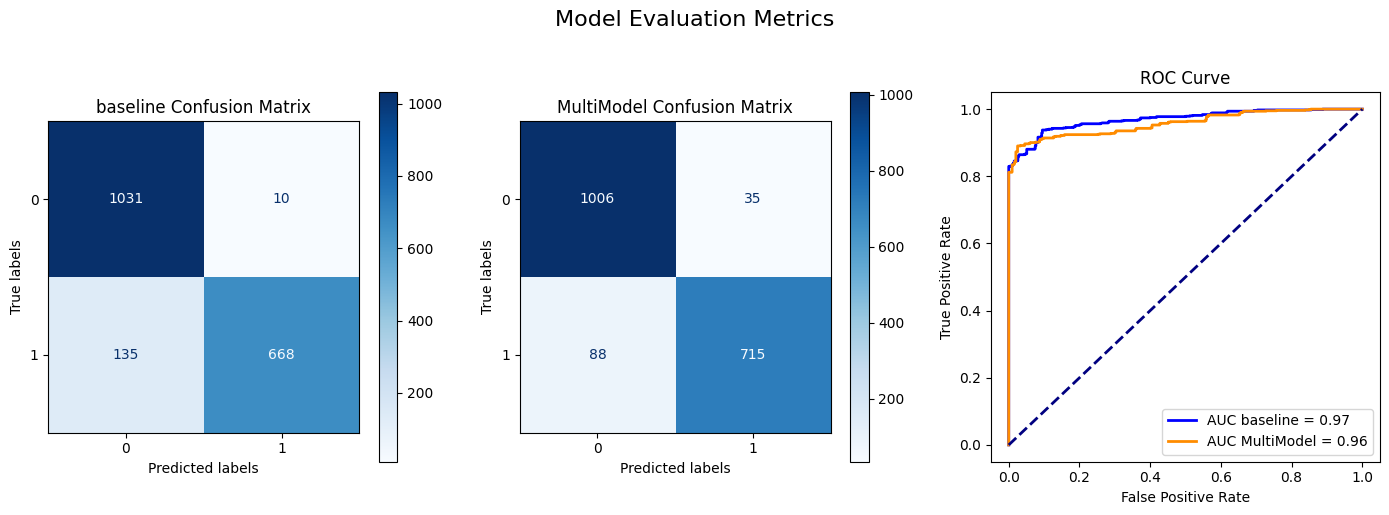

In [12]:
eval.plot_metrics()